In [1]:
#pip install imbalanced-learn
from scipy.stats import sem
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import warnings

warnings.filterwarnings('ignore')

In [2]:
tracks = pd.read_csv('trafficDataset2.csv')
print(tracks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   oid          4759 non-null   int64  
 1   timestamp    4759 non-null   float64
 2   x            4759 non-null   float64
 3   y            4759 non-null   float64
 4   body_roll    4759 non-null   object 
 5   body_pitch   4759 non-null   object 
 6   body_yaw     4759 non-null   object 
 7   head_roll    4759 non-null   object 
 8   head_pitch   4759 non-null   object 
 9   head_yaw     4759 non-null   object 
 10  other_oid    4759 non-null   object 
 11  other_class  4759 non-null   object 
 12  labels2      4759 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 483.5+ KB
None


In [3]:
from sklearn.utils import shuffle
tracks = shuffle(tracks)
tracks.head()

,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,other_oid,other_class,labels2
3351,50155,1813.9,496046.9382,5405736.620,None,None,None,None,None,None,"[50153, 50166, 50164, 50163, 50162, 50161, 476...","[3, 3, 3, 3, 3, 3, 0, 4, 4]",BUS
1087,19340,239.6,496005.8986,5406139.238,None,None,None,None,None,None,"[19351, 19350, 19304, 18991, 19349, 19348, 193...","[5, 3, 3, 0, 4, 4, 4, 4, 3, 3]",EGO CAR
3657,50154,1814.8,496048.5854,5405735.742,None,None,None,None,None,None,"[50161, 47646, 50164, 50163, 50155, 50154, 501...","[3, 0, 3, 3, 4, 4, 5, 3]",TRAIN
1460,41832,2480.5,495905.1980,5405742.785,0,0,256.8,0,0,308,"[41832, 38509]","[4, 0]",PEDESTRIANS
3353,50155,1814.1,496047.1819,5405736.577,None,None,None,None,None,None,"[50164, 50163, 47646, 50153, 50161, 50162, 501...","[3, 3, 0, 3, 3, 3, 4, 4, 3]",BUS


In [4]:
le = LabelEncoder()
tracks['output_class'] = le.fit_transform(tracks['other_class'])
tracks['output_broll'] = le.fit_transform(tracks['body_roll'])
tracks['output_bpitch'] = le.fit_transform(tracks['body_pitch'])
tracks['output_byaw'] = le.fit_transform(tracks['body_yaw'])
tracks['output_hroll'] = le.fit_transform(tracks['head_roll'])
tracks['output_hpitch'] = le.fit_transform(tracks['head_pitch'])
tracks['output_hyaw'] = le.fit_transform(tracks['head_yaw'])

tracks['xLe'] = le.fit_transform(tracks['x'])
tracks['yLe'] = le.fit_transform(tracks['y'])
tracks['timestampLe'] = le.fit_transform(tracks['timestamp'])

tracks['output'] = le.fit_transform(tracks['labels2'])
tracks.head()


,oid,timestamp,x,y,body_roll,body_pitch,body_yaw,head_roll,head_pitch,head_yaw,...,output_broll,output_bpitch,output_byaw,output_hroll,output_hpitch,output_hyaw,xLe,yLe,timestampLe,output
3351,50155,1813.9,496046.9382,5405736.620,None,None,None,None,None,None,...,125,174,1179,329,453,1315,2089,610,1960,0
1087,19340,239.6,496005.8986,5406139.238,None,None,None,None,None,None,...,125,174,1179,329,453,1315,993,4435,221,3
3657,50154,1814.8,496048.5854,5405735.742,None,None,None,None,None,None,...,125,174,1179,329,453,1315,2113,448,1969,8
1460,41832,2480.5,495905.1980,5405742.785,0,0,256.8,0,0,308,...,41,131,673,181,268,1002,410,1223,2791,7
3353,50155,1814.1,496047.1819,5405736.577,None,None,None,None,None,None,...,125,174,1179,329,453,1315,2093,600,1962,0


In [5]:
track = tracks
track = tracks.astype('float64',errors="ignore")


In [21]:
# X = tracks[['oid','timestamp']].values
# y = tracks['output'].values
X = tracks[['timestampLe','xLe','output_broll','output_bpitch','output_byaw','output_hroll','output_hpitch','output_hyaw']].values
y = tracks["output"].values


# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=11)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [24]:
y_pred = classifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
print('accuracy score is: '+str(accuracy_score(y_test, y_pred)))

accuracy score is: 0.8508403361344538


In [11]:
X = tracks[['timestampLe','xLe','output_broll','output_bpitch','output_byaw','output_hroll','output_hpitch','output_hyaw']].values
y = tracks["output"].values

neighbour = [3,5,7,9,11]
Accuracy = []
accuracyRate = []


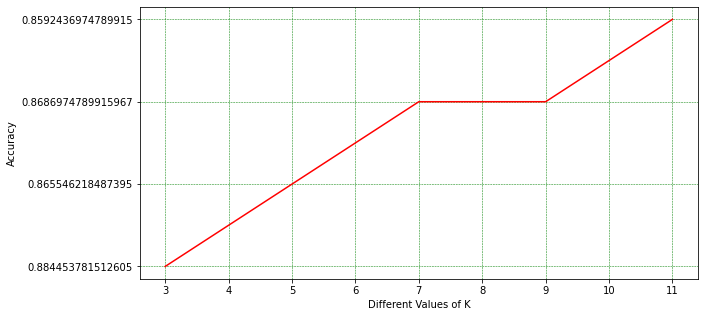

In [19]:
#KNN and Plotting for 80-20
i=30
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20)
for j in neighbour:
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=j)
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)
    from sklearn.metrics import accuracy_score
  #Printing
# print('accuracy score is: '+str(accuracy_score(Y_test, Y_pred)))
    Accuracy.append(str(accuracy_score(Y_test, Y_pred)))
    accuracyRate.append([0.3,j,str(accuracy_score(Y_test, Y_pred))])
    
#Graph For K values       
plt.figure(figsize=(10,5))
plt.xlabel('Different Values of K')
plt.ylabel('Accuracy')
plt.plot(neighbour,Accuracy, color = 'r', label = "Accuracy at different K-values, when test-size is "+str(i)
                ) 
    
    # plt.legend(bbox_to_anchor=(1, 1)
    
         #bbox_transform=plt.gcf().transFigure)
plt.grid(axis='both', color = 'green', linestyle = '--' , linewidth = 0.5)
plt.show()
Accuracy = []

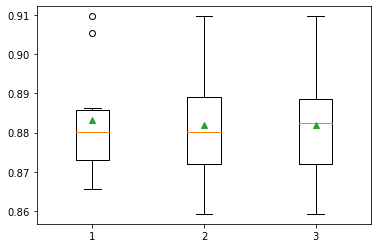

In [13]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = KNeighborsClassifier(3)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModel(X, y):
    repeats = range(1,4)
    results = []
    for r in repeats:
        scores = evaluate_model(X, y, r)
        results.append(scores)
    plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
    plt.show()
    
X = tracks[['timestampLe','xLe','output_broll','output_bpitch','output_byaw','output_hroll','output_hpitch','output_hyaw']].values
y = tracks["output"].values
callModel(X, y)

In [98]:
# Removing highly correlated features having correlation > 0.90
import numpy as np

cor_matrix = tracks.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
data = tracks.drop(to_drop, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 579 to 3232
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   oid            4759 non-null   int64  
 1   timestamp      4759 non-null   float64
 2   x              4759 non-null   float64
 3   y              4759 non-null   float64
 4   body_roll      4759 non-null   object 
 5   body_pitch     4759 non-null   object 
 6   body_yaw       4759 non-null   object 
 7   head_roll      4759 non-null   object 
 8   head_pitch     4759 non-null   object 
 9   head_yaw       4759 non-null   object 
 10  other_oid      4759 non-null   object 
 11  other_class    4759 non-null   object 
 12  labels         4729 non-null   object 
 13  output_class   4759 non-null   int32  
 14  output_broll   4759 non-null   int32  
 15  output_bpitch  4759 non-null   int32  
 16  output_byaw    4759 non-null   int32  
 17  output_hroll   4759 non-null   int32  
 18  output

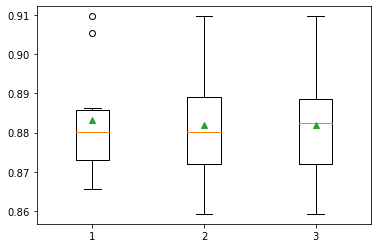

In [14]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from matplotlib import pyplot as plt

def evaluate_model(X, y, repeats):
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
    model = KNeighborsClassifier(3)
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv=cv, n_jobs=-1)
    return scores

def callModel(X, y):
    repeats = range(1,4)
    results = []
    for r in repeats:
        scores = evaluate_model(X, y, r)
        results.append(scores)
    plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
    plt.show()
    
X = tracks[['timestampLe','xLe','output_broll','output_bpitch','output_byaw','output_hroll','output_hpitch','output_hyaw']].values
y = tracks["output"].values
callModel(X, y)

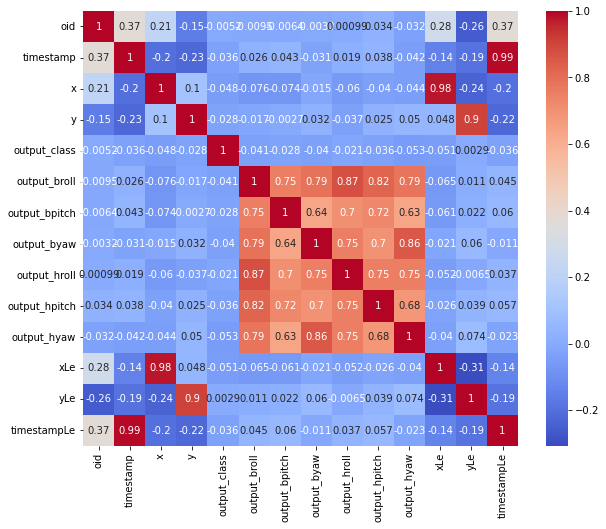

In [15]:
feature_mean = list(tracks.columns[:-1])
plt.figure(figsize=(10,8))
sns.heatmap(tracks[feature_mean].corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

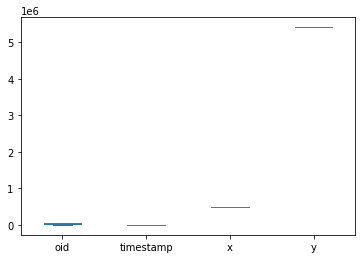

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#import seaborn
#seaborn.set(style='ticks')
df = pd.read_csv('tracks.csv')
df.plot.box(layout=(2,2))
plt.show()

In [17]:
df.drop_duplicates(inplace=True, keep='first')
len(df)

4759

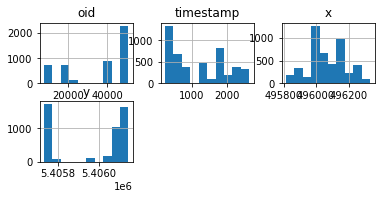

In [18]:
df = pd.read_csv('trafficDataset.csv')
df.hist(layout=(3,3))
plt.show()

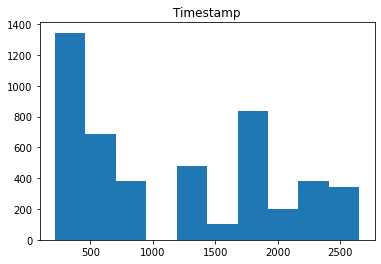

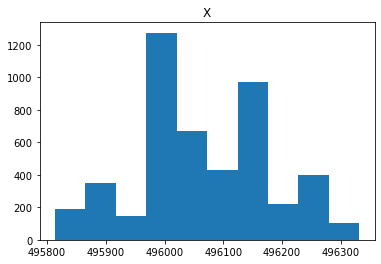

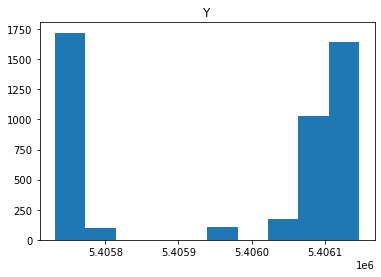

In [104]:
#Visualizing Data

plt.hist(tracks['timestamp'],bins=10)
plt.title('Timestamp')
plt.show()

plt.hist(tracks['x'],bins=10)
plt.title('X')
plt.show()

plt.hist(tracks['y'],bins=10)
plt.title('Y')
plt.show()


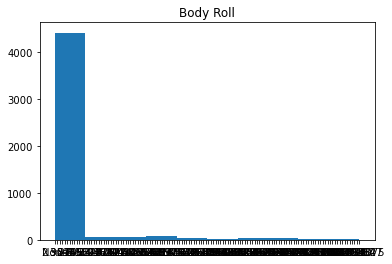

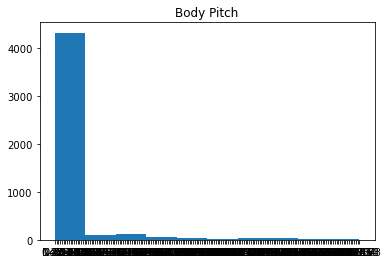

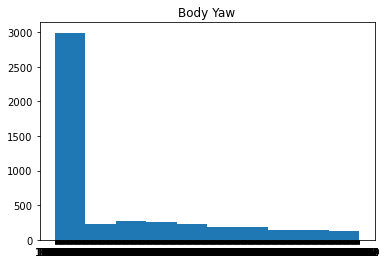

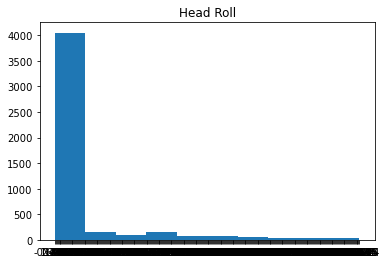

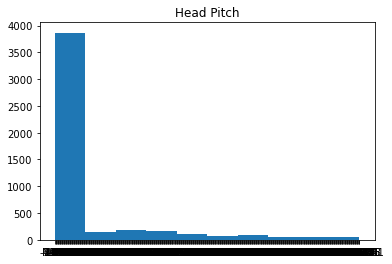

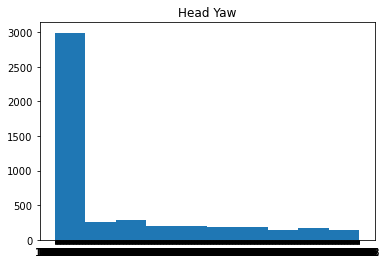

In [10]:
plt.hist(tracks['body_roll'],bins=10)
plt.title('Body Roll')
plt.show()

plt.hist(tracks['body_pitch'],bins=10)
plt.title('Body Pitch')
plt.show()

plt.hist(tracks['body_yaw'],bins=10)
plt.title('Body Yaw')
plt.show()

plt.hist(tracks['head_roll'],bins=10)
plt.title('Head Roll')
plt.show()

plt.hist(tracks['head_pitch'],bins=10)
plt.title('Head Pitch')
plt.show()

plt.hist(tracks['head_yaw'],bins=10)
plt.title('Head Yaw')
plt.show()

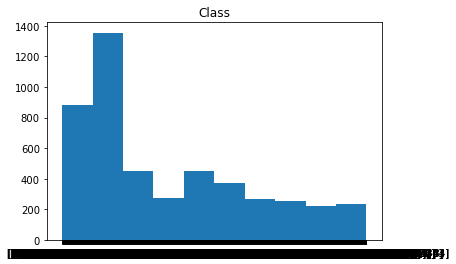

In [19]:
plt.hist(tracks['other_class'],bins=10)
plt.title('Class')
plt.show()


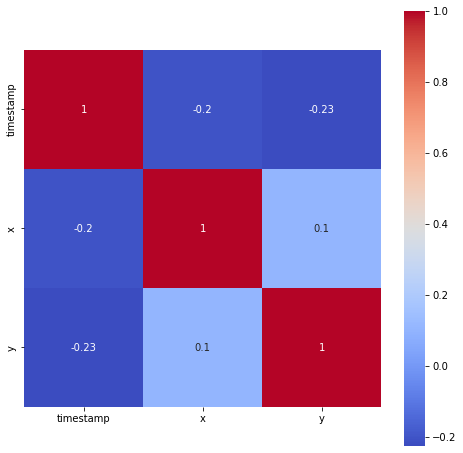

In [127]:
feature_mean = list(tracks.columns[:-1])
plt.figure(figsize=(8,8))
sns.heatmap(tracks[feature_mean].corr(),annot=True,square=True,cmap='coolwarm')
plt.show()

In [6]:
tracks.drop(columns=['other_class','other_x','other_y'],axis=1,inplace=True)

<AxesSubplot:xlabel='x', ylabel='y'>

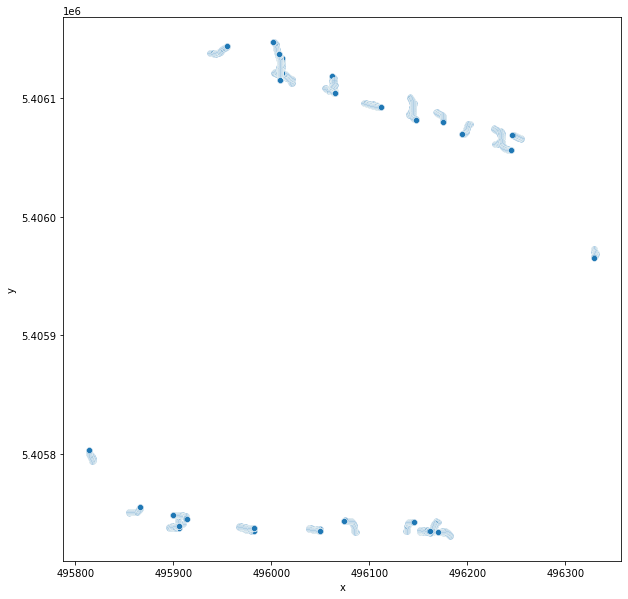

In [30]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tracks,x='x',y='y')

<AxesSubplot:xlabel='x', ylabel='timestamp'>

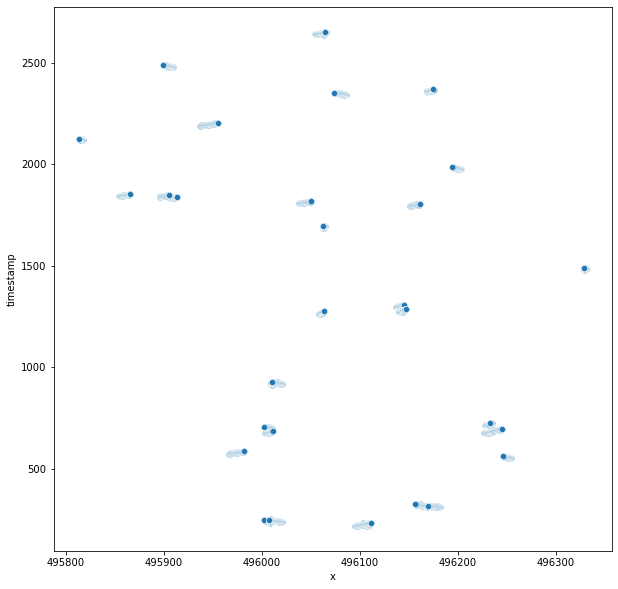

In [31]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tracks,x='x',y='timestamp')

<AxesSubplot:xlabel='timestamp', ylabel='y'>

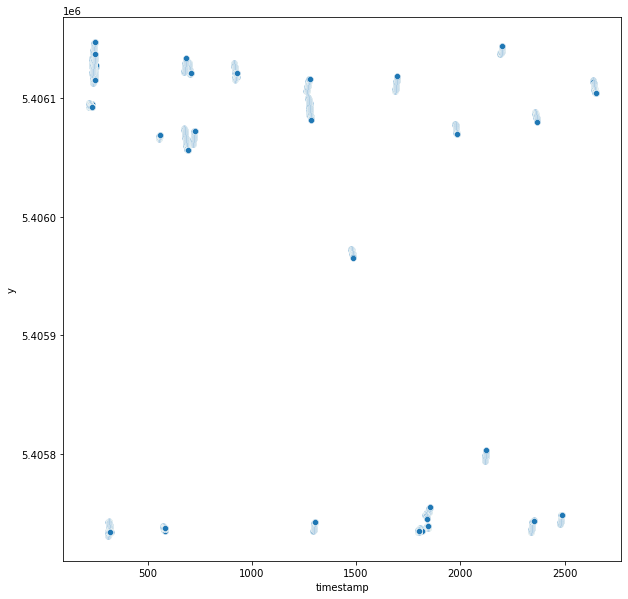

In [32]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=tracks,x='timestamp',y='y')

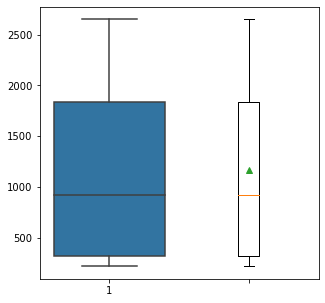

In [105]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=tracks['timestamp'])
plt.boxplot(tracks['timestamp'],showmeans=True)
plt.show()

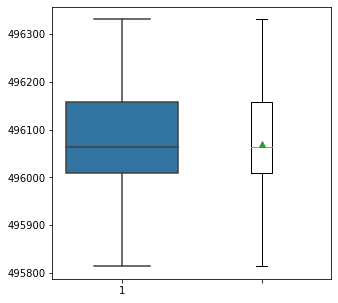

In [106]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=tracks['x'])
plt.boxplot(tracks['x'],showmeans=True)
plt.show()

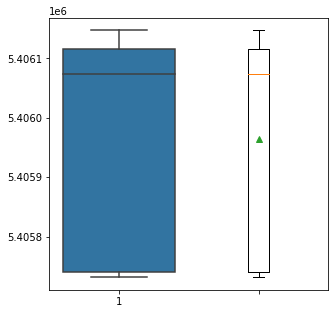

In [107]:
plt.figure(figsize=(5,5))
ax = sns.boxplot(data=tracks['y'])
plt.boxplot(tracks['y'],showmeans=True)
plt.show()